In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
import seaborn as sns
import pandas as pd

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
pm.__version__, az.__version__

('5.5.0', '0.15.1')

::: callout-note
Generating data and plotting

:::

In [3]:
np.random.seed(123)
N = 100
alpha_real = 2.5
beta_real = [.9, 1.5]
eps_real = np.random.normal(0, .5, size=N)

X = np.array([np.random.normal(i, j, N) for i, j in zip([10,2], [1, 1.5])]).T
X_mean = X.mean(axis=0, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

In [4]:
def scatter_plot(x, y):
    plt.figure(figsize=(10,10))
    for idx, x_i in enumerate(x.T):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel(f'x_{idx+1}')
        plt.ylabel(f'y', rotation=0)
    plt.subplot(2,2, idx+2)
    plt.scatter(x[:,0], x[:,1])
    plt.xlabel(f'x_{idx}')
    plt.ylabel(f'x_{idx+1}', rotation=0)

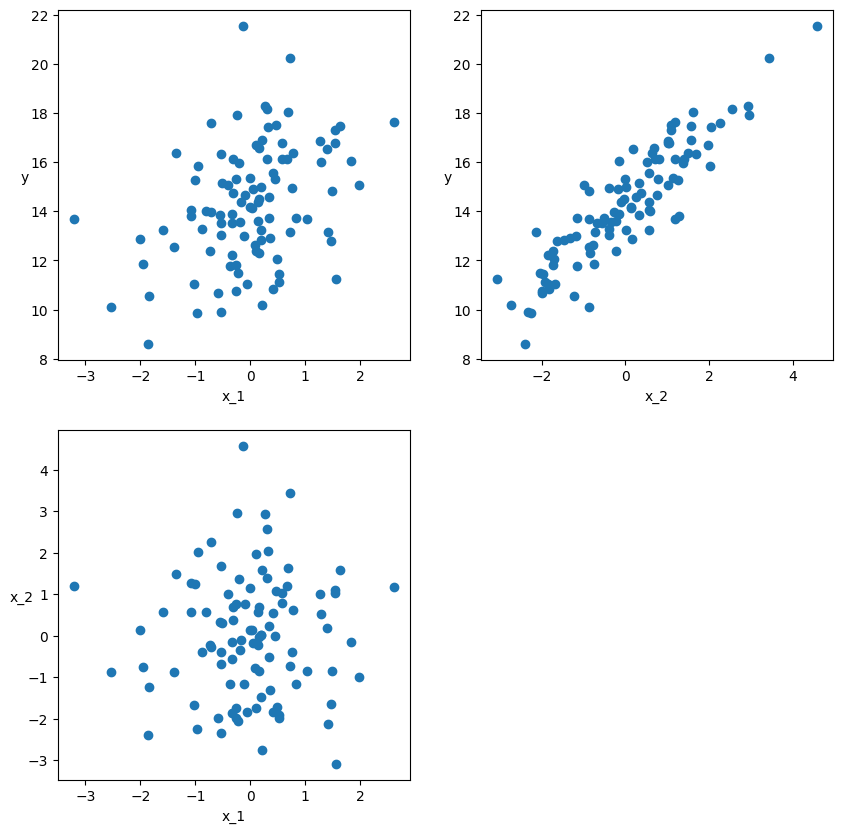

In [5]:
import matplotlib
matplotlib.pyplot.close()
scatter_plot(X_centered, y)

In [6]:
with pm.Model() as model_mlr:
 	α_tmp = pm.Normal('α_tmp', mu=0, sigma=10)
 	β = pm.Normal('β', mu=0, sigma=1, shape=2)
 	ϵ = pm.HalfCauchy('ϵ', 5)
 	μ = α_tmp + pm.math.dot(X_centered, β)
 	α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))
 	y_pred = pm.Normal('y_pred', mu=μ, sigma=ϵ, observed=y)

In [7]:
with model_mlr:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α_tmp, β, ϵ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


In [8]:
az.summary(idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_tmp,14.281,0.060,14.172,14.393,0.001,0.001,6525.0,3070.0,1.0
β[0],0.887,0.060,0.772,0.998,0.001,0.001,5690.0,2744.0,1.0
β[1],1.475,0.039,1.399,1.546,0.001,0.000,4937.0,3072.0,1.0
ϵ,0.580,0.043,0.505,0.662,0.001,0.000,5856.0,3361.0,1.0
α[0],2.686,0.603,1.607,3.898,0.008,0.006,5747.0,3004.0,1.0


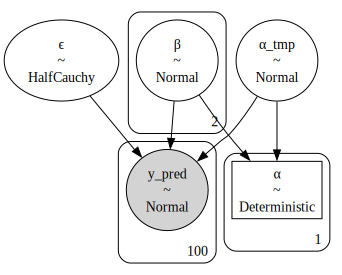

In [9]:
pm.model_to_graphviz(model_mlr)

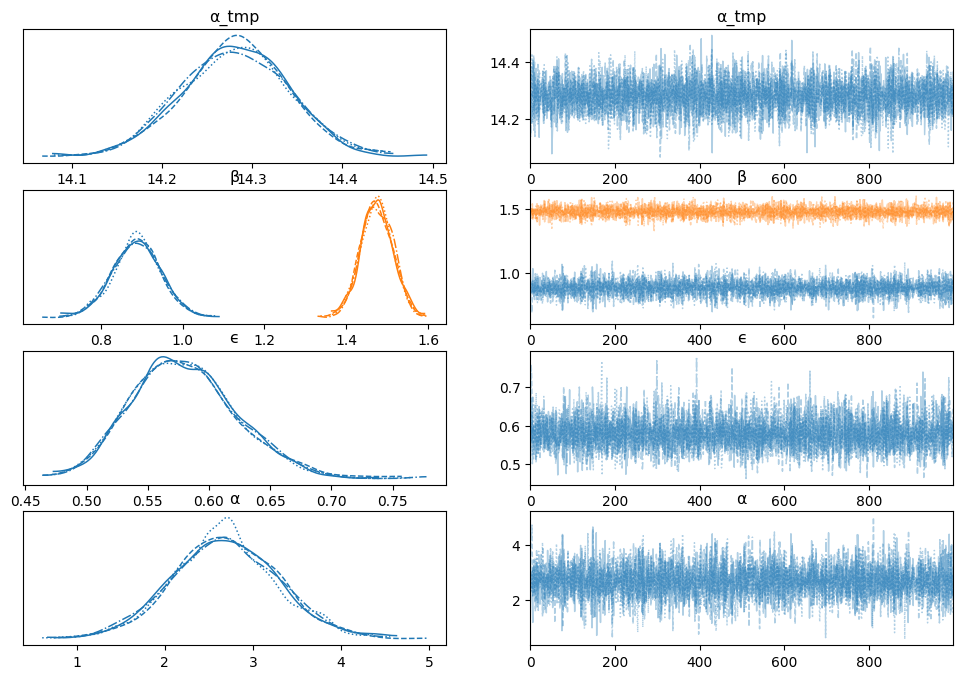

In [10]:
az.plot_trace(idata);

In [11]:
with model_mlr:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

Sampling: [y_pred]


In [12]:
idata.posterior_predictive

<xarray.Dataset>
Dimensions:       (chain: 4, draw: 1000, y_pred_dim_2: 100)
Coordinates:
  * chain         (chain) int32 0 1 2 3
  * draw          (draw) int32 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * y_pred_dim_2  (y_pred_dim_2) int32 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
Data variables:
    y_pred        (chain, draw, y_pred_dim_2) float64 16.71 12.59 ... 16.55
Attributes:
    created_at:                 2023-06-21T04:41:11.983038
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.3.1

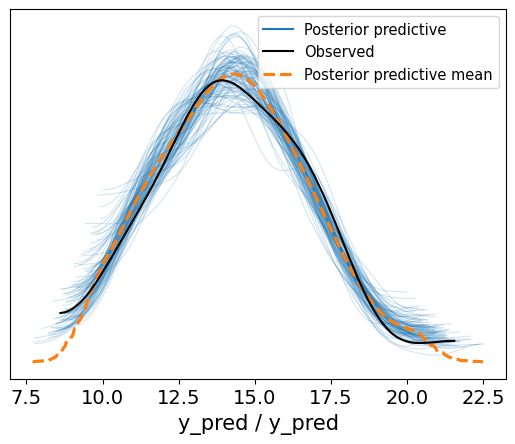

In [13]:
az.plot_ppc(idata, mean=True, observed=True, num_pp_samples=100);

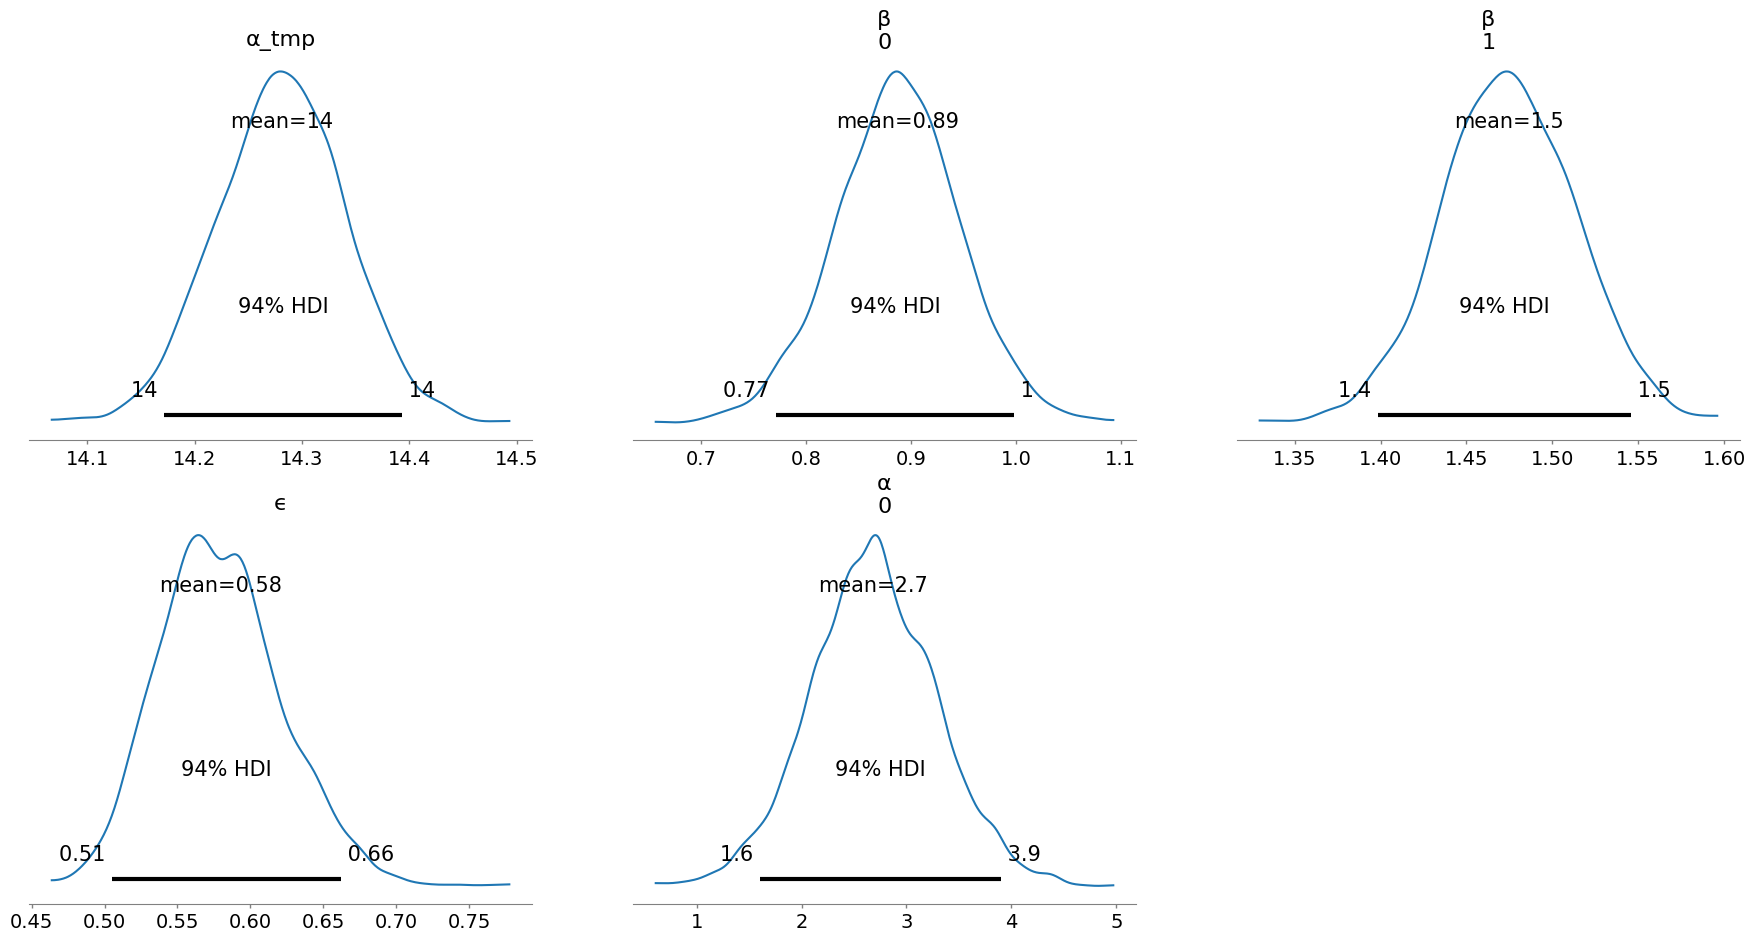

In [15]:
az.plot_posterior(idata, ref_val_color="red");

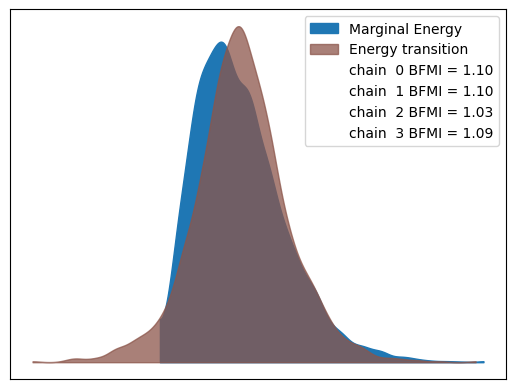

In [21]:
az.plot_energy(idata);

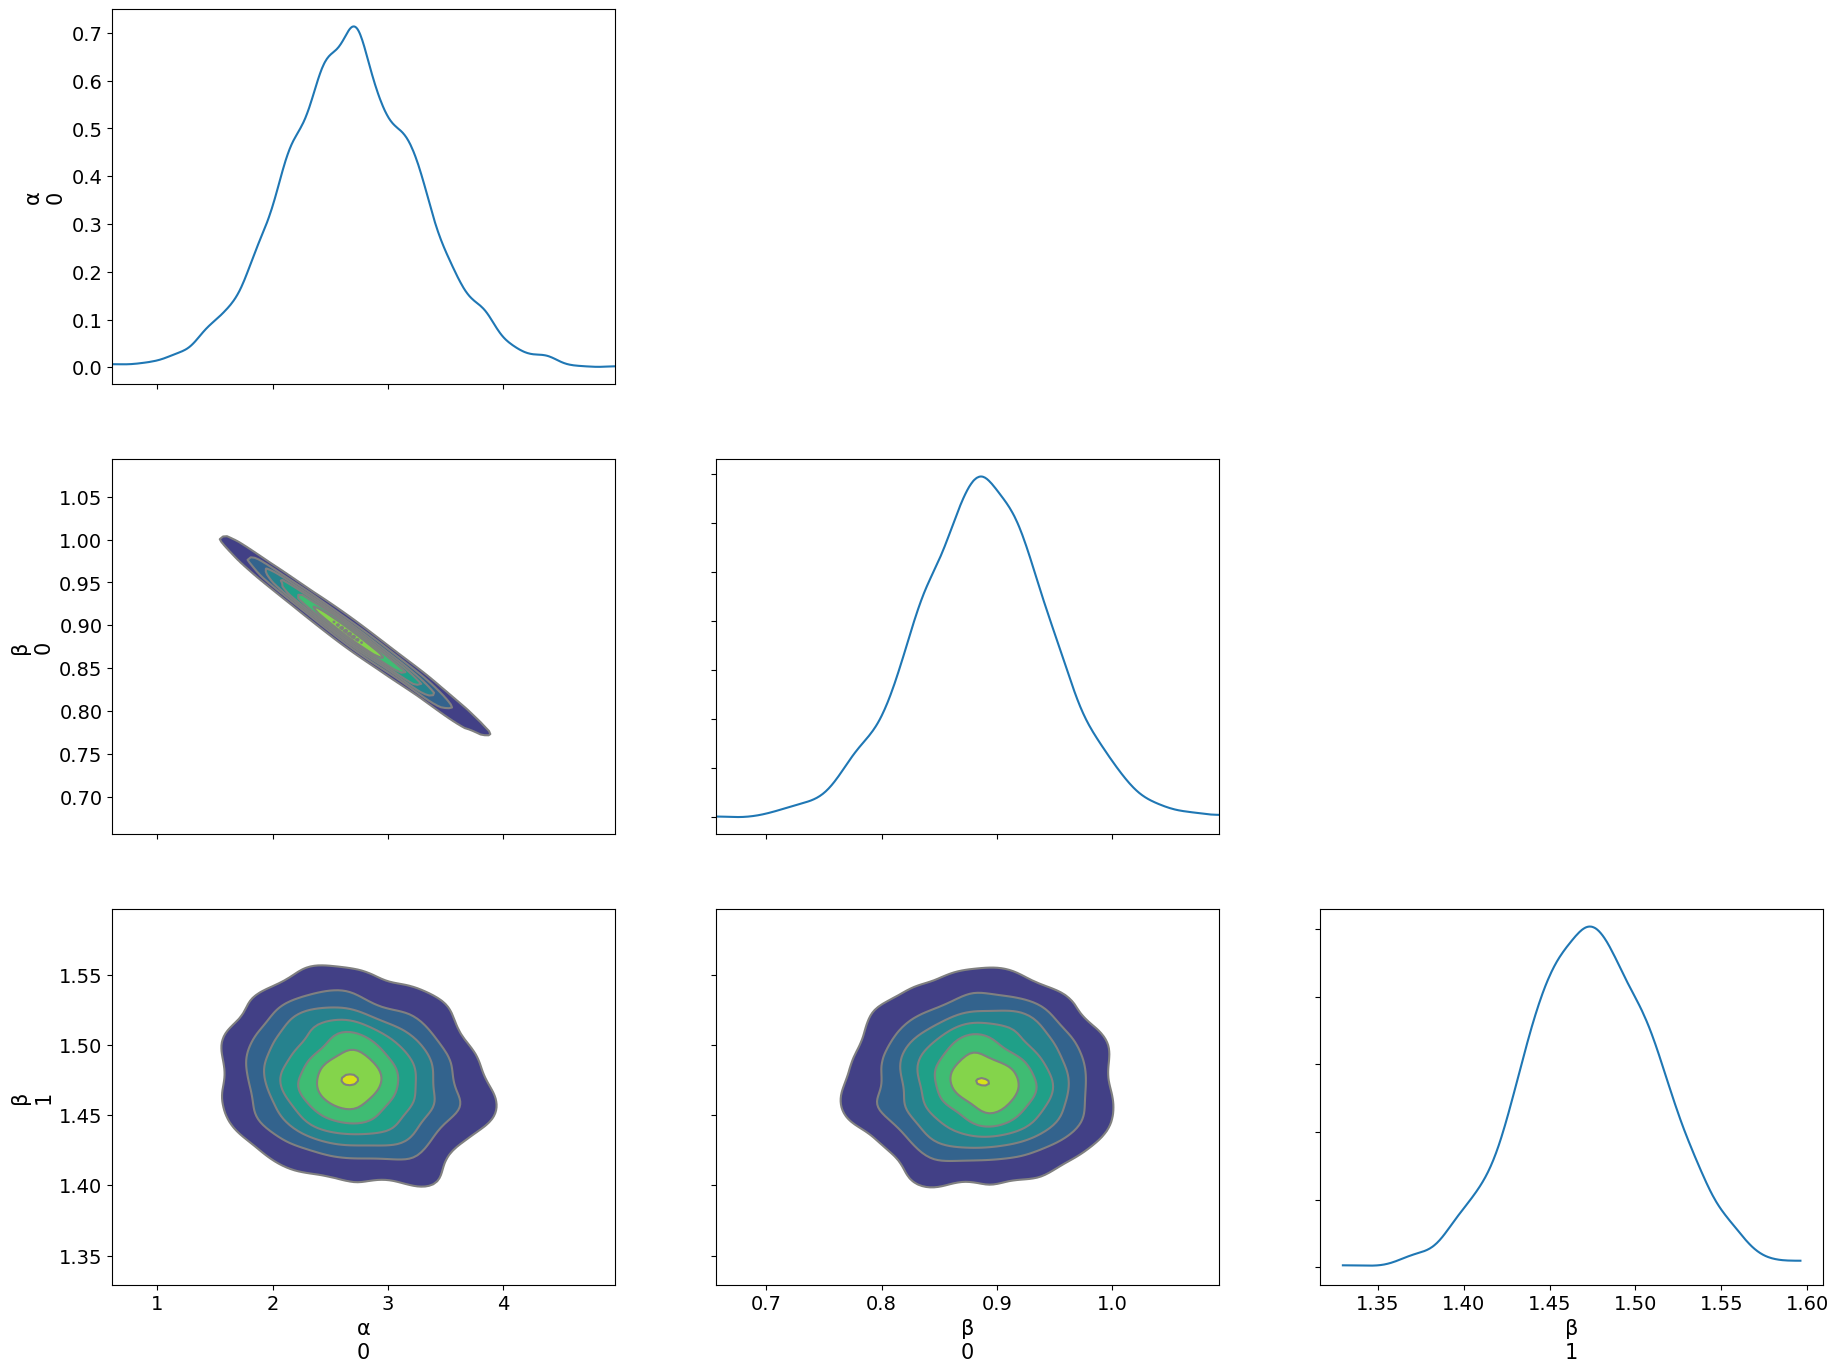

In [22]:
az.plot_pair(idata, var_names=["α", "β"], kind="kde", marginals=True);

In [41]:
# Extract the mean values from idata for each variable
mean_values = {var_name: values.mean() for var_name, values in idata.posterior.items()}
mean_values


{'α_tmp': <xarray.DataArray 'α_tmp' ()>
 array(14.28121747),
 'β': <xarray.DataArray 'β' ()>
 array(1.18101406),
 'ϵ': <xarray.DataArray 'ϵ' ()>
 array(0.57978833),
 'α': <xarray.DataArray 'α' ()>
 array(2.68553018)}

Text(0.5, 1.0, 'Data')

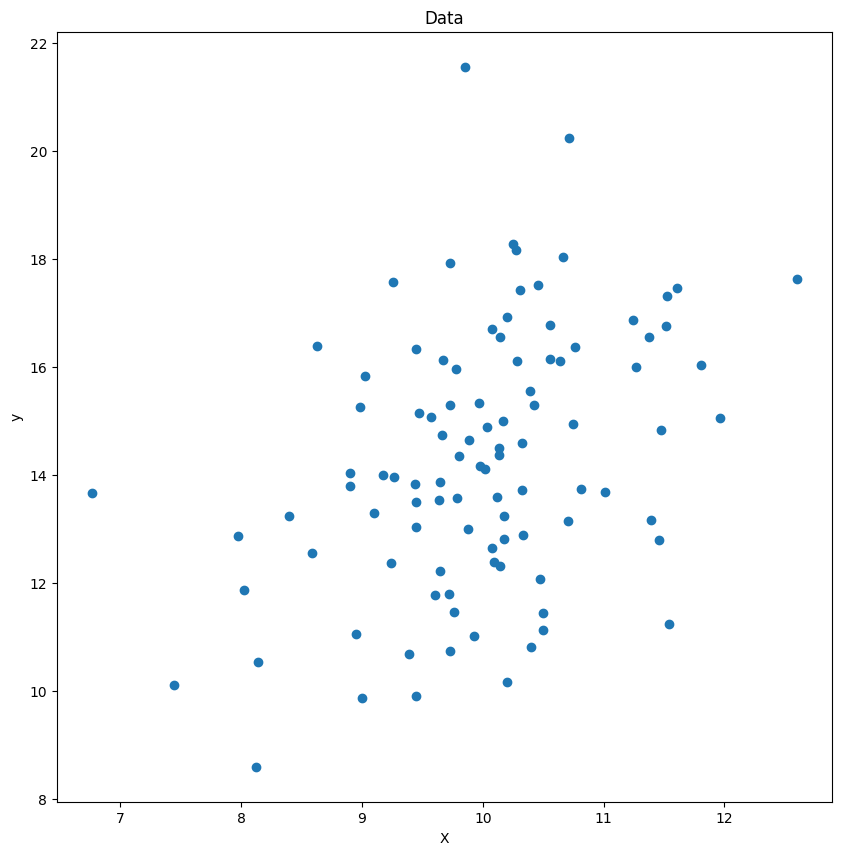

In [43]:
# Plot the data
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], y, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data')


::: callout-tip
## testing
* fitting linear regression
* plot

:::

In [23]:
#fit linear regression using sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)


0.012401217827429645

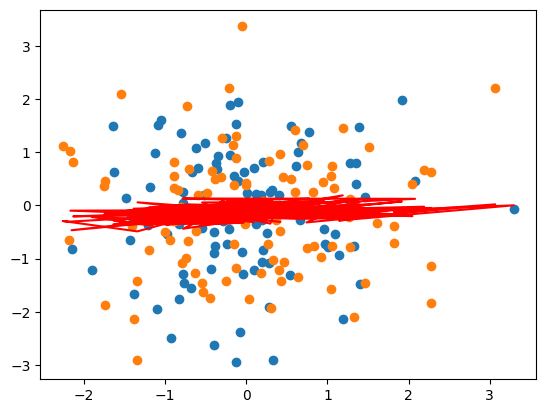

In [24]:
#plot the linear regression fit
plt.scatter(X[:,0], Y[:,0])
plt.scatter(X[:,1], Y[:,1])
plt.plot(X, reg.predict(X), color='red')
plt.show()